In [158]:
# Increase max number of columns displayed in output tables
options(repr.matrix.max.cols = 2000)
set.seed(10) # Make sure your ML results are the same
# Calling external libraries for additional functionality
suppressMessages(library(tidyverse))
suppressMessages(library(randomForest))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(caret))
suppressMessages(library(e1071))
suppressMessages(library(pROC))
suppressMessages(library(rpart.plot))
suppressMessages(library(neuralnet))
suppressMessages(library(fastDummies))
cat('Setup complete!')

Setup complete!

In [159]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
cat('Data loading, please wait\n')
diabete_data <- read.csv(file="data/dataset_diabetes/diabetic_data.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

In [160]:
head(diabete_data)
str(diabete_data)

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


'data.frame':	101766 obs. of  50 variables:
 $ encounter_id            : int  2278392 149190 64410 500364 16680 35754 55842 63768 12522 15738 ...
 $ patient_nbr             : int  8222157 55629189 86047875 82442376 42519267 82637451 84259809 114882984 48330783 63555939 ...
 $ race                    : Factor w/ 6 levels "?","AfricanAmerican",..: 4 4 2 4 4 4 4 4 4 4 ...
 $ gender                  : Factor w/ 3 levels "Female","Male",..: 1 1 1 2 2 2 2 2 1 1 ...
 $ age                     : Factor w/ 10 levels "[0-10)","[10-20)",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ weight                  : Factor w/ 10 levels ">200","?","[0-25)",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ admission_type_id       : int  6 1 1 1 1 2 3 1 2 3 ...
 $ discharge_disposition_id: int  25 1 1 1 1 1 1 1 1 3 ...
 $ admission_source_id     : int  1 7 7 7 7 2 2 7 4 4 ...
 $ time_in_hospital        : int  1 3 2 2 1 3 4 5 13 12 ...
 $ payer_code              : Factor w/ 18 levels "?","BC","CH",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ medical_speci

In [161]:
diabete_data[diabete_data == '?'] <- NA

In [162]:
cat('Number of Missing Data for Each Variable:')
sapply(diabete_data, function(x) sum(is.na(x)))

Number of Missing Data for Each Variable:

encounter_id              patient_nbr                     race 
                       0                        0                     2273 
                  gender                      age                   weight 
                       0                        0                    98569 
       admission_type_id discharge_disposition_id      admission_source_id 
                       0                        0                        0 
        time_in_hospital               payer_code        medical_specialty 
                       0                    40256                    49949 
      num_lab_procedures           num_procedures          num_medications 
                       0                        0                        0 
       number_outpatient         number_emergency         number_inpatient 
                       0                        0                        0 
                  diag_1                   diag_2                   diag_3 
                      21                      358                     1423 
        number_diagnoses            max_glu_serum                A1Cresult 
                       0                        0                        0 
               metformin              repaglinide              nateglinide 
                       0                        0                        0 
          chlorpropamide              glimepiride            acetohexamide 
                       0                        0                        0 
               glipizide                glyburide              tolbutamide 
                       0                        0                        0 
            pioglitazone            rosiglitazone                 acarbose 
                       0                        0                        0 
                miglitol             troglitazone               tolazamide 
                       0                        0                        0 
                 examide              citoglipton                  insulin 
                       0                        0                        0 
     glyburide.metformin      glipizide.metformin glimepiride.pioglitazone 
                       0                        0                        0 
 metformin.rosiglitazone   metformin.pioglitazone                   change 
                       0                        0                        0 
             diabetesMed               readmitted 
                       0                        0

In [163]:
table(diabete_data$admission_source_id, exclude = NULL)


    1     2     3     4     5     6     7     8     9    10    11    13    14 
29565  1104   187  3187   855  2264 57494    16   125     8     2     1     2 
   17    20    22    25 
 6781   161    12     2 

In [164]:
# Missing values
diabete_data$admission_source_id[diabete_data$admission_source_id == 9] <- NA
diabete_data$admission_source_id[diabete_data$admission_source_id == 15] <- NA
diabete_data$admission_source_id[diabete_data$admission_source_id == 17] <- NA
diabete_data$admission_source_id[diabete_data$admission_source_id == 20] <- NA
diabete_data$admission_source_id[diabete_data$admission_source_id == 21] <- NA

In [165]:
# convert less common values to 'Other'
diabete_data$admission_source_id[diabete_data$admission_source_id==8 
                                | diabete_data$admission_source_id==10
                                | diabete_data$admission_source_id==11
                                | diabete_data$admission_source_id==13
                                | diabete_data$admission_source_id==14
                                | diabete_data$admission_source_id==22
                                | diabete_data$admission_source_id==25] <- 0

In [166]:
table(diabete_data$admission_source_id, exclude = NULL)


    0     1     2     3     4     5     6     7  <NA> 
   43 29565  1104   187  3187   855  2264 57494  7067 

In [167]:
# Create 'admission_source'
diabete_data <- mutate(diabete_data, admission_source = ifelse(admission_source_id == 0, 'Other', 
                                            ifelse(admission_source_id == 1, 'Physician_Referral',
                                            ifelse(admission_source_id == 2, 'Clinic_Referral',
                                            ifelse(admission_source_id == 3, 'HMO_Referral',
                                            ifelse(admission_source_id == 4, 'Transfer_from_Hospital',
                                            ifelse(admission_source_id == 5, 'Transfer_from_SNF',
                                            ifelse(admission_source_id == 6, 'Transfer_from_Healthcare_Facility',
                                            ifelse(admission_source_id == 7, 'Emergency_Room', NA)))))))))

In [168]:
head(diabete_data[c('admission_source_id', 'admission_source')])

admission_source_id,admission_source
<dbl>,<chr>
1,Physician_Referral
7,Emergency_Room
7,Emergency_Room
7,Emergency_Room
7,Emergency_Room
2,Clinic_Referral


In [169]:
table(diabete_data$admission_type_id, exclude = NULL)


    1     2     3     4     5     6     7     8 
53990 18480 18869    10  4785  5291    21   320 

In [170]:
# Missing values
diabete_data$admission_type_id[diabete_data$admission_type_id == 5] <- NA # Not Available
diabete_data$admission_type_id[diabete_data$admission_type_id == 6] <- NA # NULL
diabete_data$admission_type_id[diabete_data$admission_type_id == 8] <- NA # Not Mapped

In [171]:
# convert less common values to 'Other'
diabete_data$admission_type_id[diabete_data$admission_type_id==4 
                                | diabete_data$admission_type_id==7] <- 0

In [172]:
table(diabete_data$admission_type_id, exclude = NULL)


    0     1     2     3  <NA> 
   31 53990 18480 18869 10396 

In [173]:
# Create 'admission_type'
diabete_data <- mutate(diabete_data, admission_type = ifelse(admission_type_id == 0, 'Other', 
                                            ifelse(admission_type_id == 1, 'Emergency',
                                            ifelse(admission_type_id == 2, 'Urgent',
                                            ifelse(admission_type_id == 3, 'Elective', NA)))))

In [174]:
head(diabete_data[c('admission_type_id', 'admission_type')])

admission_type_id,admission_type
<dbl>,<chr>
NA,NA
1,Emergency
1,Emergency
1,Emergency
1,Emergency
2,Urgent


In [175]:
table(diabete_data$discharge_disposition_id, exclude = NULL)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
60234  2128 13954   815  1184 12902   623   108    21     6  1642     3   399 
   14    15    16    17    18    19    20    22    23    24    25    27    28 
  372    63    11    14  3691     8     2  1993   412    48   989     5   139 

In [176]:
# Missing values
diabete_data$discharge_disposition_id[diabete_data$discharge_disposition_id == 18] <- NA # NULL
diabete_data$discharge_disposition_id[diabete_data$discharge_disposition_id == 25] <- NA # Not Mapped
diabete_data$discharge_disposition_id[diabete_data$discharge_disposition_id == 26] <- NA # Unknown/Invalid


In [177]:
# convert less common values to 'Other'
diabete_data$discharge_disposition_id[diabete_data$discharge_disposition_id==9 
                                     | diabete_data$discharge_disposition_id==10
                                     | diabete_data$discharge_disposition_id==12
                                     | diabete_data$discharge_disposition_id==15
                                     | diabete_data$discharge_disposition_id==16
                                     | diabete_data$discharge_disposition_id==17
                                     | diabete_data$discharge_disposition_id==19
                                     | diabete_data$discharge_disposition_id==20
                                     | diabete_data$discharge_disposition_id==24
                                     | diabete_data$discharge_disposition_id==27] <- 0

In [178]:
table(diabete_data$discharge_disposition_id, exclude = NULL)


    0     1     2     3     4     5     6     7     8    11    13    14    22 
  181 60234  2128 13954   815  1184 12902   623   108  1642   399   372  1993 
   23    28  <NA> 
  412   139  4680 

In [179]:
# Create 'discharge_disposition'
diabete_data <- mutate(diabete_data, discharge_disposition = ifelse(discharge_disposition_id == 0, 'Other', 
                                            ifelse(discharge_disposition_id == 1, 'Home',
                                            ifelse(discharge_disposition_id == 2, 'Short_term_hospital',
                                            ifelse(discharge_disposition_id == 3, 'SNF',
                                            ifelse(discharge_disposition_id == 4, 'ICF',
                                            ifelse(discharge_disposition_id == 5, 'another_type_of_inpatient_care_institution',
                                            ifelse(discharge_disposition_id == 6, 'Home_with_home_health_service',
                                            ifelse(discharge_disposition_id == 7, 'Left_AMA',
                                            ifelse(discharge_disposition_id == 8, 'home_under_care_of_home_IV_provider',
                                            ifelse(discharge_disposition_id == 11, 'Expired',
                                            ifelse(discharge_disposition_id == 13, 'Hospice/Home',
                                            ifelse(discharge_disposition_id == 14, 'Hospice/Medical_facility',
                                            ifelse(discharge_disposition_id == 22, 'Another_rehab_fac_including_rehab_units_of_a_hospital',
                                            ifelse(discharge_disposition_id == 23, 'Long_term_care_hospital',
                                            ifelse(discharge_disposition_id == 28, 'Psychiatric_hospital_of_psychiatric_distinct_part_unit_of_a_hospital',
                                                   NA))))))))))))))))

In [180]:
head(diabete_data[c('discharge_disposition_id', 'discharge_disposition')])

discharge_disposition_id,discharge_disposition
<dbl>,<chr>
NA,NA
1,Home
1,Home
1,Home
1,Home
1,Home


In [181]:
diabete_data$admission_source <- as.factor(diabete_data$admission_source)
diabete_data$admission_type <- as.factor(diabete_data$admission_type)
diabete_data$discharge_disposition <- as.factor(diabete_data$discharge_disposition)

cat('Conversion complete!')

Conversion complete!

In [182]:
summary(diabete_data[,-1])

  patient_nbr                     race                   gender     
 Min.   :      135   ?              :    0   Female         :54708  
 1st Qu.: 23413221   AfricanAmerican:19210   Male           :47055  
 Median : 45505143   Asian          :  641   Unknown/Invalid:    3  
 Mean   : 54330401   Caucasian      :76099                          
 3rd Qu.: 87545950   Hispanic       : 2037                          
 Max.   :189502619   Other          : 1506                          
                     NA's           : 2273                          
      age              weight      admission_type_id discharge_disposition_id
 [70-80):26068   [75-100) : 1336   Min.   :0.000     Min.   : 0.000          
 [60-70):22483   [50-75)  :  897   1st Qu.:1.000     1st Qu.: 1.000          
 [50-60):17256   [100-125):  625   Median :1.000     Median : 1.000          
 [80-90):17197   [125-150):  145   Mean   :1.615     Mean   : 2.924          
 [40-50): 9685   [25-50)  :   97   3rd Qu.:2.000     3rd Q

In [183]:
sapply(diabete_data, function(x) sum(is.na(x)))

encounter_id              patient_nbr                     race 
                       0                        0                     2273 
                  gender                      age                   weight 
                       0                        0                    98569 
       admission_type_id discharge_disposition_id      admission_source_id 
                   10396                     4680                     7067 
        time_in_hospital               payer_code        medical_specialty 
                       0                    40256                    49949 
      num_lab_procedures           num_procedures          num_medications 
                       0                        0                        0 
       number_outpatient         number_emergency         number_inpatient 
                       0                        0                        0 
                  diag_1                   diag_2                   diag_3 
                      21                      358                     1423 
        number_diagnoses            max_glu_serum                A1Cresult 
                       0                        0                        0 
               metformin              repaglinide              nateglinide 
                       0                        0                        0 
          chlorpropamide              glimepiride            acetohexamide 
                       0                        0                        0 
               glipizide                glyburide              tolbutamide 
                       0                        0                        0 
            pioglitazone            rosiglitazone                 acarbose 
                       0                        0                        0 
                miglitol             troglitazone               tolazamide 
                       0                        0                        0 
                 examide              citoglipton                  insulin 
                       0                        0                        0 
     glyburide.metformin      glipizide.metformin glimepiride.pioglitazone 
                       0                        0                        0 
 metformin.rosiglitazone   metformin.pioglitazone                   change 
                       0                        0                        0 
             diabetesMed               readmitted         admission_source 
                       0                        0                     7067 
          admission_type    discharge_disposition 
                   10396                     4680

In [184]:
table(diabete_data$diag_1, exclude = NULL)


    10     11    110    112    114    115    117    131    133    135    136 
     1     10      2     73      1      2      9      2      1     27      5 
   141    142    143    145    146    147    148    149    150    151    152 
     6      4      1      1      4      2      1      2     27     62     15 
   153    154    155    156    157    158    160    161    162    163    164 
   311     94     54     18    114     12      1     12    425      9      3 
   170    171    172    173    174    175    179    180    182    183    184 
     2     12      4      3    147      5      4      6    108     31     10 
   185    187    188    189    191    192    193    194    195    196    197 
   173      2    112    126     45      4     28      2      9     25    320 
   198    199    200    201    202    203    204    205    207    208    210 
   242     14     16     10    104     35     23     27      1      5      7 
   211    212    214    215    216    217    218    219    220 

In [185]:
# These 3 variables are integers
# Find a way to deal with icd9 = E-V
head(diabete_data[c('diag_1', 'diag_2', 'diag_3')])
class(diabete_data$diag_1)
typeof(diabete_data$diag_1)

# Using as.numeric only will not convert the factor into intergers, need as.character
diabete_data$diag_1 <- as.character(diabete_data$diag_1)

# Getting a lot of missing because all of the diagnosis codes that start with letters are 
# classified as NAs
diabete_data <- mutate(diabete_data, diag_1 = ifelse((diag_1 >= '390' & diag_1 <= '459') | diag_1 == '785', 'Circulatory',
                                                    ifelse((diag_1 >= '460' & diag_1 <= '519') | diag_1 == '786', 'Respiratory',
                                                    ifelse((diag_1 >= '520' & diag_1 <= '579') | diag_1 == '787', 'Digestive',
                                                    ifelse(diag_1 >= '250' & diag_1 < '251', 'Diabetes',
                                                    ifelse(diag_1 >= '800' & diag_1 <= '999', 'Injury',
                                                    ifelse(diag_1 >= '710' & diag_1 <= '739', 'Musculoskeletal',
                                                    ifelse((diag_1 >= '580' & diag_1 <= '629') | diag_1 == '788', 'Genitourinary',
                                                    ifelse(diag_1 >= '140' & diag_1 <= '239', 'Neoplasms','Other')))))))))


diag_1,diag_2,diag_3
<fct>,<fct>,<fct>
250.83,NA,NA
276,250.01,255
648,250,V27
8,250.43,403
197,157,250
414,411,250


[1] "factor"

[1] "integer"

In [186]:
table(diabete_data$diag_1, exclude = NULL)


    Circulatory        Diabetes       Digestive   Genitourinary          Injury 
          30490            8757            9543            5118            7046 
Musculoskeletal       Neoplasms           Other     Respiratory            <NA> 
           4957            3435           17934           14465              21 

In [187]:
# Using as.numeric only will not convert the factor into intergers, need as.character
diabete_data$diag_2 <- as.character(diabete_data$diag_2)

# Getting a lot of missing because all of the diagnosis codes that start with letters are 
# classified as NAs
diabete_data <- mutate(diabete_data, diag_2 = ifelse((diag_2 >= '390' & diag_2 <= '459') | diag_2 == '785', 'Circulatory',
                                                    ifelse((diag_2 >= '460' & diag_2 <= '519') | diag_2 == '786', 'Respiratory',
                                                    ifelse((diag_2 >= '520' & diag_2 <= '579') | diag_2 == '787', 'Digestive',
                                                    ifelse(diag_2 >= '250' & diag_2 < '251', 'Diabetes',
                                                    ifelse(diag_2 >= '800' & diag_2 <= '999', 'Injury',
                                                    ifelse(diag_2 >= '710' & diag_2 <= '739', 'Musculoskeletal',
                                                    ifelse((diag_2 >= '580' & diag_2 <= '629') | diag_2 == '788', 'Genitourinary',
                                                    ifelse(diag_2 >= '140' & diag_2 <= '239', 'Neoplasms','Other')))))))))



In [188]:
table(diabete_data$diag_2, exclude = NULL)


    Circulatory        Diabetes       Digestive   Genitourinary          Injury 
          32357           12794            4212            8376            2464 
Musculoskeletal       Neoplasms           Other     Respiratory            <NA> 
           1764            2547           25998           10896             358 

In [189]:
# Using as.numeric only will not convert the factor into intergers, need as.character
diabete_data$diag_3 <- as.character(diabete_data$diag_3)

# Getting a lot of missing because all of the diagnosis codes that start with letters are 
# classified as NAs
diabete_data <- mutate(diabete_data, diag_3 = ifelse((diag_3 >= '390' & diag_3 <= '459') | diag_3 == '785', 'Circulatory',
                                                    ifelse((diag_3 >= '460' & diag_3 <= '519') | diag_3 == '786', 'Respiratory',
                                                    ifelse((diag_3 >= '520' & diag_3 <= '579') | diag_3 == '787', 'Digestive',
                                                    ifelse(diag_3 >= '250' & diag_3 < '251', 'Diabetes',
                                                    ifelse(diag_3 >= '800' & diag_3 <= '999', 'Injury',
                                                    ifelse(diag_3 >= '710' & diag_3 <= '739', 'Musculoskeletal',
                                                    ifelse((diag_3 >= '580' & diag_3 <= '629') | diag_3 == '788', 'Genitourinary',
                                                    ifelse(diag_3 >= '140' & diag_3 <= '239', 'Neoplasms','Other')))))))))




In [190]:
table(diabete_data$diag_3, exclude = NULL)


    Circulatory        Diabetes       Digestive   Genitourinary          Injury 
          31056           17157            3970            6680            1974 
Musculoskeletal       Neoplasms           Other     Respiratory            <NA> 
           1915            1857           28371            7363            1423 

In [191]:
sapply(diabete_data, function(x) sum(is.na(x)))

encounter_id              patient_nbr                     race 
                       0                        0                     2273 
                  gender                      age                   weight 
                       0                        0                    98569 
       admission_type_id discharge_disposition_id      admission_source_id 
                   10396                     4680                     7067 
        time_in_hospital               payer_code        medical_specialty 
                       0                    40256                    49949 
      num_lab_procedures           num_procedures          num_medications 
                       0                        0                        0 
       number_outpatient         number_emergency         number_inpatient 
                       0                        0                        0 
                  diag_1                   diag_2                   diag_3 
                      21                      358                     1423 
        number_diagnoses            max_glu_serum                A1Cresult 
                       0                        0                        0 
               metformin              repaglinide              nateglinide 
                       0                        0                        0 
          chlorpropamide              glimepiride            acetohexamide 
                       0                        0                        0 
               glipizide                glyburide              tolbutamide 
                       0                        0                        0 
            pioglitazone            rosiglitazone                 acarbose 
                       0                        0                        0 
                miglitol             troglitazone               tolazamide 
                       0                        0                        0 
                 examide              citoglipton                  insulin 
                       0                        0                        0 
     glyburide.metformin      glipizide.metformin glimepiride.pioglitazone 
                       0                        0                        0 
 metformin.rosiglitazone   metformin.pioglitazone                   change 
                       0                        0                        0 
             diabetesMed               readmitted         admission_source 
                       0                        0                     7067 
          admission_type    discharge_disposition 
                   10396                     4680

In [192]:
diabete_data=subset(diabete_data, select = -c(weight,payer_code) )

In [193]:
head(diabete_data)
table(diabete_data$discharge_disposition)

encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,admission_source,admission_type,discharge_disposition
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2278392,8222157,Caucasian,Female,[0-10),NA,NA,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,Diabetes,NA,NA,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Physician_Referral,NA,NA
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NA,59,0,18,0,0,0,Other,Diabetes,Other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency_Room,Emergency,Home
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NA,11,5,13,2,0,1,Other,Diabetes,Other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency_Room,Emergency,Home
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NA,44,1,16,0,0,0,Other,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency_Room,Emergency,Home
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NA,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency_Room,Emergency,Home
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NA,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,Clinic_Referral,Urgent,Home



               Another_rehab_fac_including_rehab_units_of_a_hospital 
                                                                1993 
                                                             Expired 
                                                                1642 
                                                                Home 
                                                               60234 
                                       Home_with_home_health_service 
                                                               12902 
                                                        Hospice/Home 
                                                                 399 
                                            Hospice/Medical_facility 
                                                                 372 
                                                                 ICF 
                                                                 815 
                   

In [194]:
diabete_data <- mutate(diabete_data, discharge_disposition=ifelse(discharge_disposition=='Home', 'Home' ,
                                                            ifelse(discharge_disposition=='SNF', 'SNF',
                                                            ifelse(discharge_disposition=='Home_with_home_health_service', 'Home_with_home_health_service',
                                                            'Other' ))))

In [195]:
table(diabete_data$discharge_disposition)



                         Home Home_with_home_health_service 
                        60234                         12902 
                        Other                           SNF 
                         9996                         13954 

In [196]:
sapply(diabete_data, function(x) sum(is.na(x)))

encounter_id              patient_nbr                     race 
                       0                        0                     2273 
                  gender                      age        admission_type_id 
                       0                        0                    10396 
discharge_disposition_id      admission_source_id         time_in_hospital 
                    4680                     7067                        0 
       medical_specialty       num_lab_procedures           num_procedures 
                   49949                        0                        0 
         num_medications        number_outpatient         number_emergency 
                       0                        0                        0 
        number_inpatient                   diag_1                   diag_2 
                       0                       21                      358 
                  diag_3         number_diagnoses            max_glu_serum 
                    1423                        0                        0 
               A1Cresult                metformin              repaglinide 
                       0                        0                        0 
             nateglinide           chlorpropamide              glimepiride 
                       0                        0                        0 
           acetohexamide                glipizide                glyburide 
                       0                        0                        0 
             tolbutamide             pioglitazone            rosiglitazone 
                       0                        0                        0 
                acarbose                 miglitol             troglitazone 
                       0                        0                        0 
              tolazamide                  examide              citoglipton 
                       0                        0                        0 
                 insulin      glyburide.metformin      glipizide.metformin 
                       0                        0                        0 
glimepiride.pioglitazone  metformin.rosiglitazone   metformin.pioglitazone 
                       0                        0                        0 
                  change              diabetesMed               readmitted 
                       0                        0                        0 
        admission_source           admission_type    discharge_disposition 
                    7067                    10396                     4680

In [197]:
# Original paper only keeps first encounter for each patient ID to keep obs independent; we chose to keep all patient IDs
# 
summary(diabete_data[,-1])

  patient_nbr                     race                   gender     
 Min.   :      135   ?              :    0   Female         :54708  
 1st Qu.: 23413221   AfricanAmerican:19210   Male           :47055  
 Median : 45505143   Asian          :  641   Unknown/Invalid:    3  
 Mean   : 54330401   Caucasian      :76099                          
 3rd Qu.: 87545950   Hispanic       : 2037                          
 Max.   :189502619   Other          : 1506                          
                     NA's           : 2273                          
      age        admission_type_id discharge_disposition_id admission_source_id
 [70-80):26068   Min.   :0.000     Min.   : 0.000           Min.   :0.000      
 [60-70):22483   1st Qu.:1.000     1st Qu.: 1.000           1st Qu.:1.000      
 [50-60):17256   Median :1.000     Median : 1.000           Median :7.000      
 [80-90):17197   Mean   :1.615     Mean   : 2.924           Mean   :4.915      
 [40-50): 9685   3rd Qu.:2.000     3rd Qu.: 3.00

In [198]:
diabete_data=subset(diabete_data,select=-c(repaglinide,nateglinide,chlorpropamide,acetohexamide,tolbutamide
                                  ,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton
                                  ,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone
                                   ,metformin.rosiglitazone,metformin.pioglitazone))

In [199]:
diabete_data <- mutate(diabete_data, metformin=ifelse(metformin=='No', 'No' ,'Yes'))
diabete_data <- mutate(diabete_data, glimepiride=ifelse(glimepiride=='No', 'No' ,'Yes'))
diabete_data <- mutate(diabete_data, glipizide=ifelse(glipizide=='No', 'No' ,'Yes'))
diabete_data <- mutate(diabete_data, glyburide=ifelse(glyburide=='No', 'No' ,'Yes'))
diabete_data <- mutate(diabete_data, pioglitazone=ifelse(pioglitazone=='No', 'No' ,'Yes'))
diabete_data <- mutate(diabete_data, rosiglitazone=ifelse(rosiglitazone=='No', 'No' ,'Yes'))
diabete_data <- mutate(diabete_data, insulin=ifelse(insulin=='No', 'No' ,'Yes'))

In [200]:
table(diabete_data$medical_specialty,exclude=NULL)


                                   ?                 AllergyandImmunology 
                                   0                                    7 
                      Anesthesiology             Anesthesiology-Pediatric 
                                  12                                   19 
                          Cardiology                 Cardiology-Pediatric 
                                5352                                    7 
                             DCPTEAM                            Dentistry 
                                   6                                    4 
                         Dermatology                     Emergency/Trauma 
                                   1                                 7565 
                       Endocrinology             Endocrinology-Metabolism 
                                 120                                    8 
              Family/GeneralPractice                     Gastroenterology 
                        

In [201]:
diabete_data <- mutate(diabete_data, medical_specialty=ifelse(medical_specialty=='Cardiology' | medical_specialty=='Cardiology-Pediatric', 'Cardiology',
                                                            ifelse(medical_specialty=='InternalMedicine', 'InternalMedicine',
                                                            ifelse(medical_specialty=='Family/GeneralPractice', 'Family/GeneralPractice',
                                                            ifelse(medical_specialty=='Emergency/Trauma','Emergency/Trauma',
                                                            ifelse(medical_specialty=='Surgery-Cardiovascular'| medical_specialty=='Surgery-Cardiovascular/Thoracic'|
                                                                  medical_specialty=='Surgery-Colon&Rectal' | medical_specialty=='Surgery-General'|
                                                                   medical_specialty=='Surgery-Maxillofacial' | medical_specialty=='Surgery-Neuro' |
                                                                   medical_specialty=='Surgery-Pediatric' | medical_specialty=='Surgery-Plastic' |
                                                                   medical_specialty=='Surgery-PlasticwithinHeadandNeck' | medical_specialty == 'Surgery-Thoracic' |
                                                                   medical_specialty=='Surgery-Vascular' | medical_specialty=='SurgicalSpecialty', 'Surgery',
                                                                  
                                                            'Others'))))))

In [202]:
summary(diabete_data[,-1])
str(diabete_data)

  patient_nbr                     race                   gender     
 Min.   :      135   ?              :    0   Female         :54708  
 1st Qu.: 23413221   AfricanAmerican:19210   Male           :47055  
 Median : 45505143   Asian          :  641   Unknown/Invalid:    3  
 Mean   : 54330401   Caucasian      :76099                          
 3rd Qu.: 87545950   Hispanic       : 2037                          
 Max.   :189502619   Other          : 1506                          
                     NA's           : 2273                          
      age        admission_type_id discharge_disposition_id admission_source_id
 [70-80):26068   Min.   :0.000     Min.   : 0.000           Min.   :0.000      
 [60-70):22483   1st Qu.:1.000     1st Qu.: 1.000           1st Qu.:1.000      
 [50-60):17256   Median :1.000     Median : 1.000           Median :7.000      
 [80-90):17197   Mean   :1.615     Mean   : 2.924           Mean   :4.915      
 [40-50): 9685   3rd Qu.:2.000     3rd Qu.: 3.00

'data.frame':	101766 obs. of  35 variables:
 $ encounter_id            : int  2278392 149190 64410 500364 16680 35754 55842 63768 12522 15738 ...
 $ patient_nbr             : int  8222157 55629189 86047875 82442376 42519267 82637451 84259809 114882984 48330783 63555939 ...
 $ race                    : Factor w/ 6 levels "?","AfricanAmerican",..: 4 4 2 4 4 4 4 4 4 4 ...
 $ gender                  : Factor w/ 3 levels "Female","Male",..: 1 1 1 2 2 2 2 2 1 1 ...
 $ age                     : Factor w/ 10 levels "[0-10)","[10-20)",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ admission_type_id       : num  NA 1 1 1 1 2 3 1 2 3 ...
 $ discharge_disposition_id: num  NA 1 1 1 1 1 1 1 1 3 ...
 $ admission_source_id     : num  1 7 7 7 7 2 2 7 4 4 ...
 $ time_in_hospital        : int  1 3 2 2 1 3 4 5 13 12 ...
 $ medical_specialty       : chr  "Others" NA NA NA ...
 $ num_lab_procedures      : int  41 59 11 44 51 31 70 73 68 33 ...
 $ num_procedures          : int  0 0 5 1 0 6 1 0 2 3 ...
 $ num_medications   

# Do missing data imputation; (do we impute before or after feature selection?)

In [203]:
diabete_data <- mutate(diabete_data, readmitted=ifelse(readmitted=='<30', 'Yes' ,'No'))

In [204]:
diabete_data=subset(diabete_data,select=-c(encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id))

In [205]:
diabete_data$metformin=factor(diabete_data$metformin)
diabete_data$glimepiride=factor(diabete_data$glimepiride)
diabete_data$glipizide=factor(diabete_data$glipizide)
diabete_data$glyburide=factor(diabete_data$glyburide)
diabete_data$pioglitazone=factor(diabete_data$pioglitazone)
diabete_data$rosiglitazone=factor(diabete_data$rosiglitazone)
diabete_data$insulin=factor(diabete_data$insulin)
diabete_data$diag_1=factor(diabete_data$diag_1)
diabete_data$diag_2=factor(diabete_data$diag_2)
diabete_data$diag_3=factor(diabete_data$diag_3)
diabete_data$medical_specialty=factor(diabete_data$medical_specialty)
diabete_data$readmitted=factor(diabete_data$readmitted)
diabete_data$discharge_disposition=factor(diabete_data$discharge_disposition)

In [206]:
# Splitting the data into training and test set data
# Setting the seed value so we get the same result when we repreat
set.seed(100)

# Determining which rows willbe in the traiing data
training_index <- sample(nrow(diabete_data), 0.8*nrow(diabete_data), replace = FALSE)  

# Create Training Set
training_data <- diabete_data[training_index,]

# Create Test Set
# Don't include stroke column in test set. Prediction will create this column. If you
# include stroke variable, confusion matrix will throw an unequal lengths error
test_data <- diabete_data[-training_index,]

cat('Training and Test Data Created!')

# Set up the model
model <- (readmitted ~ race+gender+age+time_in_hospital+medical_specialty+num_lab_procedures+num_procedures+num_medications+number_outpatient+
         number_emergency+number_inpatient+diag_1+diag_2+diag_3+number_diagnoses+max_glu_serum+A1Cresult+metformin+glimepiride+glipizide+
         glyburide+pioglitazone+rosiglitazone+insulin+change+diabetesMed+admission_source+admission_type+discharge_disposition)

Training and Test Data Created!

In [207]:
head(diabete_data)

race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,admission_source,admission_type,discharge_disposition
<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Caucasian,Female,[0-10),1,Others,41,0,1,0,0,0,Diabetes,NA,NA,1,None,None,No,No,No,No,No,No,No,No,No,No,Physician_Referral,NA,NA
Caucasian,Female,[10-20),3,NA,59,0,18,0,0,0,Other,Diabetes,Other,9,None,None,No,No,No,No,No,No,Yes,Ch,Yes,No,Emergency_Room,Emergency,Home
AfricanAmerican,Female,[20-30),2,NA,11,5,13,2,0,1,Other,Diabetes,Other,6,None,None,No,No,Yes,No,No,No,No,No,Yes,No,Emergency_Room,Emergency,Home
Caucasian,Male,[30-40),2,NA,44,1,16,0,0,0,Other,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,Yes,Ch,Yes,No,Emergency_Room,Emergency,Home
Caucasian,Male,[40-50),1,NA,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,Yes,No,No,No,Yes,Ch,Yes,No,Emergency_Room,Emergency,Home
Caucasian,Male,[50-60),3,NA,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,No,No,No,No,No,No,Yes,No,Yes,No,Clinic_Referral,Urgent,Home


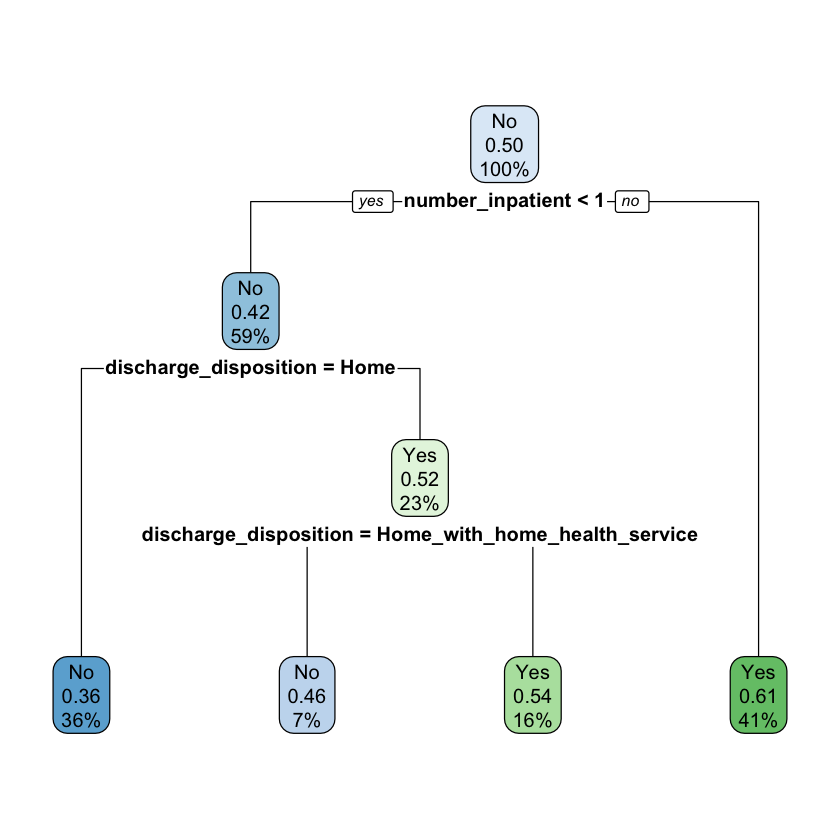

In [208]:
# Train Decision Tree
caseweights <- ifelse(training_data$readmitted == 'Yes', 8, 1)
train_decision_tree <- rpart(model, data=training_data, method = 'class',
                             control = rpart.control(minsplit=20, minbucket=1, cp = 0.005), 
                             weights = caseweights)

# Plot Decision Tree
rpart.plot(train_decision_tree)

In [209]:
# Make prediction
test_decision_tree <- predict(train_decision_tree, test_data[,-27], type = 'class')
# Display Confusion Matrix
confusionMatrix(test_decision_tree, test_data$readmitted, positive = 'Yes')

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  9680  783
       Yes 8343 1548
                                          
               Accuracy : 0.5516          
                 95% CI : (0.5448, 0.5585)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0834          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.66409         
            Specificity : 0.53709         
         Pos Pred Value : 0.15651         
         Neg Pred Value : 0.92516         
             Prevalence : 0.11452         
         Detection Rate : 0.07605         
   Detection Prevalence : 0.48595         
      Balanced Accuracy : 0.60059         
                                          
       'Positive' Class : Yes             
                        

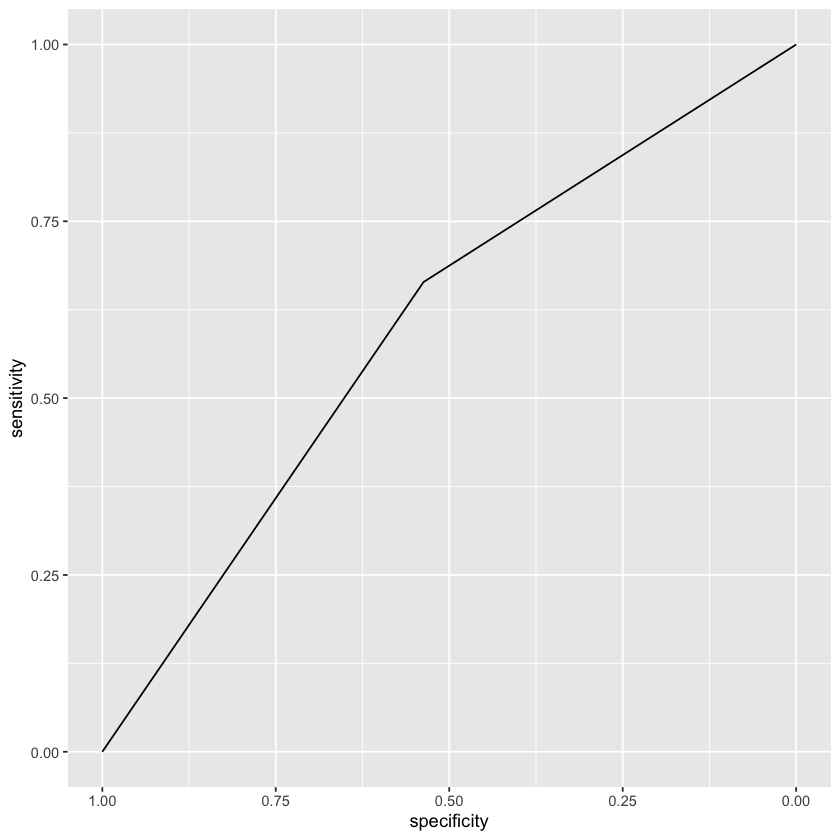

In [210]:
ROC <- roc(response = test_data$readmitted, predictor = factor(test_decision_tree, 
                                                           ordered = TRUE, 
                                                           levels = c('No', 'Yes')))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC

In [211]:
# Calculate the area under the curve (AUC)
cat('AUC:', round(auc(ROC), 2))

AUC: 0.6

In [212]:
Sys.setenv(LANG = "en")

In [213]:
# Add in NA action to exclude missing 
cat('Training Random Forest, please be patient...\n')
train_rf <- randomForest(formula = model, data = training_data, na.action=na.omit, importance = TRUE,
                        classwt = c(0.5, 0.5))

# Predict
cat('Testing Random Forest, please be patient...\n')
predict_rf <- predict(train_rf, newdata = test_data[,-27], 
                      type = "class")
                      
# Output results
cat('Outputing results...')
confusionMatrix(data = predict_rf, reference = test_data$readmitted)

Training Random Forest, please be patient...
Testing Random Forest, please be patient...
Outputing results...

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  7597  985
       Yes    3    1
                                         
               Accuracy : 0.8849         
                 95% CI : (0.878, 0.8916)
    No Information Rate : 0.8852         
    P-Value [Acc > NIR] : 0.5354         
                                         
                  Kappa : 0.0011         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.999605       
            Specificity : 0.001014       
         Pos Pred Value : 0.885225       
         Neg Pred Value : 0.250000       
             Prevalence : 0.885162       
         Detection Rate : 0.884812       
   Detection Prevalence : 0.999534       
      Balanced Accuracy : 0.500310       
                                         
       'Positive' Class : No             
                                         

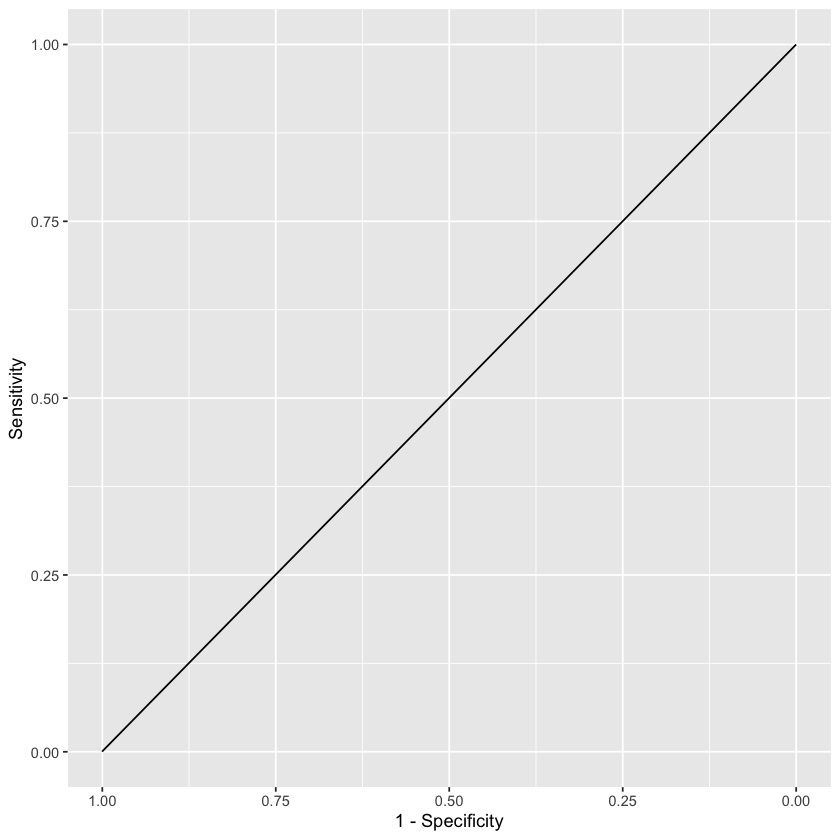

In [214]:
# Create a ROC curve
ROC <- roc(response = test_data$readmitted, predictor = factor(predict_rf, 
                                                           ordered = TRUE, 
                                                           levels = c('No', 'Yes')))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC) + xlab('1 - Specificity') + ylab('Sensitivity')
plot_ROC

In [215]:
# Calculate the area under the curve (AUC)
cat('AUC:', round(auc(ROC), 2))

AUC: 0.5

In [151]:
svm_model <- svm(model, data=training_data, na.action = na.omit)
print(svm_model)


Call:
svm(formula = model, data = training_data, na.action = na.omit)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01219512 

Number of Support Vectors:  12212



In [156]:
# Make prediction
test_svm <- predict(svm_model, test_data[,-27])
# Display Confusion Matrix
test_data= na.omit(test_data)
confusionMatrix(test_svm, test_data$readmitted)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  7600  986
       Yes    0    0
                                          
               Accuracy : 0.8852          
                 95% CI : (0.8782, 0.8918)
    No Information Rate : 0.8852          
    P-Value [Acc > NIR] : 0.5085          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8852          
         Neg Pred Value :    NaN          
             Prevalence : 0.8852          
         Detection Rate : 0.8852          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : No              
                        

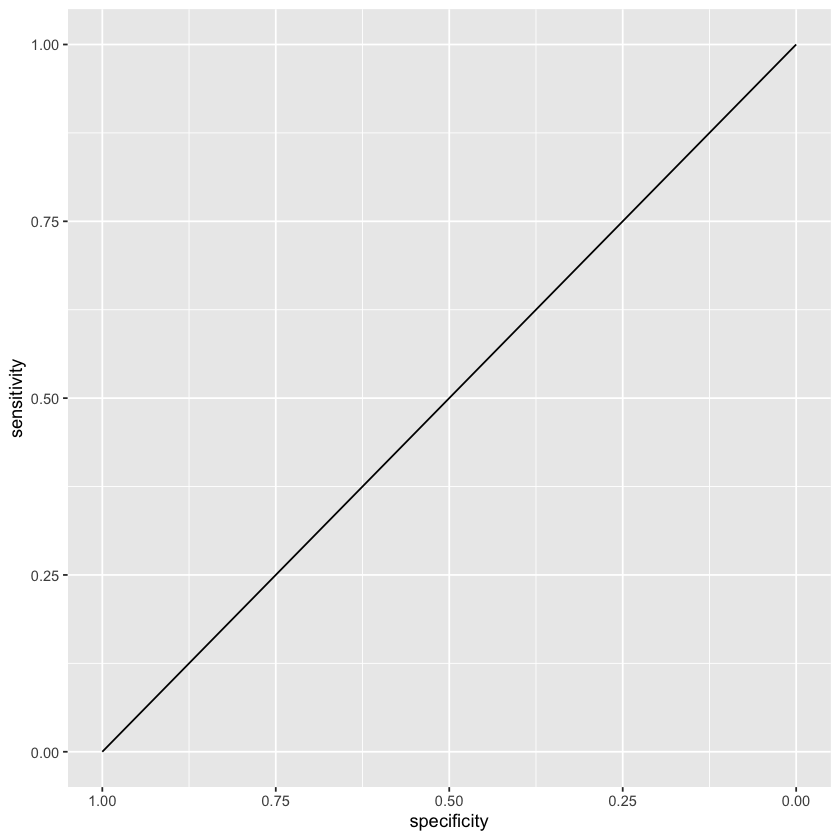

In [157]:
ROC <- roc(response = test_data$readmitted, predictor = factor(test_svm, 
                                                           ordered = TRUE, 
                                                           levels = c('No', 'Yes')))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC

In [216]:
# Calculate the area under the curve (AUC)
cat('AUC:', round(auc(ROC), 2))

AUC: 0.5